<a href="https://colab.research.google.com/github/ashleychoi121/Fashion-MNIST/blob/main/29_6_Deep_Learning_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu==2.0.0-rc1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0-rc1 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0-rc1


In [5]:
import tensorflow as tf
from tensorflow import keras
image_data = tf.keras.datasets.fashion_mnist


MNIST Fashion data has been used for this project. Different deep learning models will be built to compare and conclude with the best model for the dataset. 

In [6]:
(X_train, y_train), (X_test, y_test) = image_data.load_data()

4422102/4422102 [==============================] - 0s 0us/step


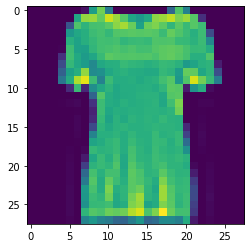

In [10]:
import matplotlib.pyplot as plt
plt.imshow(X_train[10])

In [14]:
print('Train set size:', X_train.shape)
print('Test set size:', X_test.shape)

Train set size: (60000, 28, 28)
Test set size: (10000, 28, 28)


In [15]:
input_dim = 784  # 28*28
output_dim = nb_classes = 10
batch_size = 128
nb_epoch = 20

X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [16]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

In [17]:
# Objective 1: Number of layers

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model_1 = Sequential()
# The first dense layer
model_1.add(Dense(128, input_shape=(784,), activation="relu"))
# The second dense layer
model_1.add(Dense(64, input_shape=(784,), activation="relu"))
# The last layer is the output layer
model_1.add(Dense(10, activation="softmax"))

model_1.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 1.1364 - accuracy: 0.6496
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.6721 - accuracy: 0.7780
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.5767 - accuracy: 0.8072
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.5294 - accuracy: 0.8201
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.5003 - accuracy: 0.8285
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.4796 - accuracy: 0.8358
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4635 - accuracy: 0.8402
Epoch 8/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4513 - accuracy: 0.8432
Epoch 9/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4414 - accuracy: 0.8461
Epoch 10/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4327 - accuracy: 0.8506

In [18]:
score = model_1.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.4210454225540161
Test accuracy: 0.8508999943733215


In [19]:
model_2 = Sequential()
# The first dense layer
model_2.add(Dense(512, input_shape=(784,), activation="relu"))
# The second dense layer
model_2.add(Dense(256, input_shape=(784,), activation="relu"))
# The third dense layer
model_2.add(Dense(128, input_shape=(784,), activation="relu"))
# The fourth dense layer
model_2.add(Dense(64, input_shape=(784,), activation="relu"))
# The last layer is the output layer
model_2.add(Dense(10, activation="softmax"))

model_2.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

model_2.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 6s 11ms/step - loss: 1.0709 - accuracy: 0.6653
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.6011 - accuracy: 0.7937
Epoch 3/20
469/469 [==============================] - 7s 15ms/step - loss: 0.5209 - accuracy: 0.8170
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.4777 - accuracy: 0.8337
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.4515 - accuracy: 0.8412
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.4306 - accuracy: 0.8493
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.4182 - accuracy: 0.8540
Epoch 8/20
469/469 [==============================] - 5s 11ms/step - loss: 0.4034 - accuracy: 0.8583
Epoch 9/20
469/469 [==============================] - 5s 11ms/step - loss: 0.3939 - accuracy: 0.8608
Epoch 10/20
469/469 [==============================] - 5s 11ms/step - loss: 0.3848 - accura

In [20]:
score = model_2.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.3974567949771881
Test accuracy: 0.8575000166893005


In [21]:
model_3 = Sequential()
# The first dense layer
model_3.add(Dense(1024, input_shape=(784,), activation="relu"))
# The second dense layer
model_3.add(Dense(512, input_shape=(784,), activation="relu"))
# The third dense layer
model_3.add(Dense(256, input_shape=(784,), activation="relu"))
# The fourth dense layer
model_3.add(Dense(128, input_shape=(784,), activation="relu"))
# The firth dense layer
model_3.add(Dense(64, input_shape=(784,), activation="relu"))
# The last layer is the output layer
model_3.add(Dense(10, activation="softmax"))

model_3.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

model_3.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 16s 33ms/step - loss: 1.0878 - accuracy: 0.6680
Epoch 2/20
469/469 [==============================] - 14s 30ms/step - loss: 0.5862 - accuracy: 0.7940
Epoch 3/20
469/469 [==============================] - 13s 28ms/step - loss: 0.5115 - accuracy: 0.8197
Epoch 4/20
469/469 [==============================] - 13s 28ms/step - loss: 0.4704 - accuracy: 0.8331
Epoch 5/20
469/469 [==============================] - 14s 29ms/step - loss: 0.4426 - accuracy: 0.8433
Epoch 6/20
469/469 [==============================] - 17s 36ms/step - loss: 0.4220 - accuracy: 0.8515
Epoch 7/20
469/469 [==============================] - 15s 31ms/step - loss: 0.4051 - accuracy: 0.8574
Epoch 8/20
469/469 [==============================] - 13s 28ms/step - loss: 0.3920 - accuracy: 0.8621
Epoch 9/20
469/469 [==============================] - 14s 30ms/step - loss: 0.3779 - accuracy: 0.8655
Epoch 10/20
469/469 [==============================] - 16s 35ms/step - loss: 0.368

In [22]:
score = model_3.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.38253194093704224
Test accuracy: 0.8600000143051147


For the first objective, while all the parameters are the same, different number of deep learning layers have been applied to three differet models. As a conclusion, more the layers, the accuracy increased. 

In [23]:
# Objective 2: Activation Functions

# Activation Function: ReLU

model_21 = Sequential()
# The first dense layer
model_21.add(Dense(512, input_shape=(784,), activation="relu"))
# The second dense layer
model_21.add(Dense(256, input_shape=(784,), activation="relu"))
# The third dense layer
model_21.add(Dense(128, input_shape=(784,), activation="relu"))
# The fourth dense layer
model_21.add(Dense(64, input_shape=(784,), activation="relu"))
# The last layer is the output layer
model_21.add(Dense(10, activation="softmax"))

model_21.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

model_21.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 6s 11ms/step - loss: 1.0742 - accuracy: 0.6616
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.6052 - accuracy: 0.7922
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 0.5225 - accuracy: 0.8188
Epoch 4/20
469/469 [==============================] - 6s 12ms/step - loss: 0.4804 - accuracy: 0.8320
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 0.4526 - accuracy: 0.8419
Epoch 6/20
469/469 [==============================] - 9s 19ms/step - loss: 0.4327 - accuracy: 0.8482
Epoch 7/20
469/469 [==============================] - 7s 14ms/step - loss: 0.4180 - accuracy: 0.8538
Epoch 8/20
469/469 [==============================] - 6s 13ms/step - loss: 0.4035 - accuracy: 0.8575
Epoch 9/20
469/469 [==============================] - 5s 12ms/step - loss: 0.3929 - accuracy: 0.8631
Epoch 10/20
469/469 [==============================] - 5s 12ms/step - loss: 0.3846 - accura

In [24]:
score = model_21.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.3751232326030731
Test accuracy: 0.8626000285148621


In [25]:
model_22 = Sequential()
# The first dense layer
model_22.add(Dense(512, input_shape=(784,), activation="sigmoid"))
# The second dense layer
model_22.add(Dense(256, input_shape=(784,), activation="sigmoid"))
# The third dense layer
model_22.add(Dense(128, input_shape=(784,), activation="sigmoid"))
# The fourth dense layer
model_22.add(Dense(64, input_shape=(784,), activation="sigmoid"))
# The last layer is the output layer
model_22.add(Dense(10, activation="softmax"))

model_22.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

model_22.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 6s 12ms/step - loss: 2.3111 - accuracy: 0.1007
Epoch 2/20
469/469 [==============================] - 6s 12ms/step - loss: 2.3020 - accuracy: 0.1040
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 2.3012 - accuracy: 0.1117
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 2.3003 - accuracy: 0.1112
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 2.2994 - accuracy: 0.1236
Epoch 6/20
469/469 [==============================] - 6s 12ms/step - loss: 2.2984 - accuracy: 0.1373
Epoch 7/20
469/469 [==============================] - 6s 14ms/step - loss: 2.2973 - accuracy: 0.1346
Epoch 8/20
469/469 [==============================] - 5s 11ms/step - loss: 2.2961 - accuracy: 0.1482
Epoch 9/20
469/469 [==============================] - 6s 12ms/step - loss: 2.2947 - accuracy: 0.1576
Epoch 10/20
469/469 [==============================] - 8s 17ms/step - loss: 2.2931 - accura

In [26]:
score = model_22.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 2.210146188735962
Test accuracy: 0.3573000133037567


In [27]:
model_23 = Sequential()
# The first dense layer
model_23.add(Dense(512, input_shape=(784,), activation="tanh"))
# The second dense layer
model_23.add(Dense(256, input_shape=(784,), activation="tanh"))
# The third dense layer
model_23.add(Dense(128, input_shape=(784,), activation="tanh"))
# The fourth dense layer
model_23.add(Dense(64, input_shape=(784,), activation="tanh"))
# The last layer is the output layer
model_23.add(Dense(10, activation="softmax"))

model_23.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

model_23.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 6s 11ms/step - loss: 0.8563 - accuracy: 0.7354
Epoch 2/20
469/469 [==============================] - 6s 12ms/step - loss: 0.5453 - accuracy: 0.8137
Epoch 3/20
469/469 [==============================] - 6s 14ms/step - loss: 0.4859 - accuracy: 0.8305
Epoch 4/20
469/469 [==============================] - 8s 17ms/step - loss: 0.4552 - accuracy: 0.8404
Epoch 5/20
469/469 [==============================] - 8s 16ms/step - loss: 0.4348 - accuracy: 0.8465
Epoch 6/20
469/469 [==============================] - 7s 16ms/step - loss: 0.4190 - accuracy: 0.8510
Epoch 7/20
469/469 [==============================] - 6s 14ms/step - loss: 0.4066 - accuracy: 0.8554
Epoch 8/20
469/469 [==============================] - 6s 14ms/step - loss: 0.3970 - accuracy: 0.8586
Epoch 9/20
469/469 [==============================] - 8s 17ms/step - loss: 0.3879 - accuracy: 0.8618
Epoch 10/20
469/469 [==============================] - 7s 14ms/step - loss: 0.3806 - accura

In [28]:
score = model_23.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.3889506459236145
Test accuracy: 0.8604000210762024


For the second objective, different activation functions were used to come up with the model with highest accuracy. Based on the above performance, the activation function of "Tanh" gives the best result. 

In [29]:
# Objective 3: Number of neurons in the layers

model_31 = Sequential()
# The first dense layer
model_31.add(Dense(20, input_shape=(784,), activation="tanh"))
# The second dense layer
model_31.add(Dense(20, input_shape=(784,), activation="tanh"))
# The third dense layer
model_31.add(Dense(20, input_shape=(784,), activation="tanh"))
# The fourth dense layer
model_31.add(Dense(20, input_shape=(784,), activation="tanh"))
# The last layer is the output layer
model_31.add(Dense(10, activation="softmax"))

model_31.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

model_31.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 1.5917 - accuracy: 0.5193
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 1.0210 - accuracy: 0.7163
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.7947 - accuracy: 0.7589
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.6800 - accuracy: 0.7831
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.6101 - accuracy: 0.8049
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.5610 - accuracy: 0.8197
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.5270 - accuracy: 0.8287
Epoch 8/20
469/469 [==============================] - 1s 3ms/step - loss: 0.5013 - accuracy: 0.8336
Epoch 9/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4822 - accuracy: 0.8387
Epoch 10/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4670 - accuracy: 0.8424

In [30]:
score = model_31.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.42881694436073303
Test accuracy: 0.8478999733924866


In [31]:
model_32 = Sequential()
# The first dense layer
model_32.add(Dense(512, input_shape=(784,), activation="tanh"))
# The second dense layer
model_32.add(Dense(256, input_shape=(784,), activation="tanh"))
# The third dense layer
model_32.add(Dense(128, input_shape=(784,), activation="tanh"))
# The fourth dense layer
model_32.add(Dense(64, input_shape=(784,), activation="tanh"))
# The last layer is the output layer
model_32.add(Dense(10, activation="softmax"))

model_32.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

model_32.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 6s 12ms/step - loss: 0.8842 - accuracy: 0.7338
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.5550 - accuracy: 0.8137
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.4886 - accuracy: 0.8309
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.4558 - accuracy: 0.8408
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.4347 - accuracy: 0.8477
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.4194 - accuracy: 0.8527
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.4061 - accuracy: 0.8573
Epoch 8/20
469/469 [==============================] - 5s 11ms/step - loss: 0.3961 - accuracy: 0.8601
Epoch 9/20
469/469 [==============================] - 6s 13ms/step - loss: 0.3874 - accuracy: 0.8631
Epoch 10/20
469/469 [==============================] - 5s 11ms/step - loss: 0.3804 - accura

In [32]:
score = model_32.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.379571795463562
Test accuracy: 0.8636999726295471


In [34]:
model_33 = Sequential()
# The first dense layer
model_33.add(Dense(1000, input_shape=(784,), activation="tanh"))
# The second dense layer
model_33.add(Dense(1000, input_shape=(784,), activation="tanh"))
# The third dense layer
model_33.add(Dense(1000, input_shape=(784,), activation="tanh"))
# The fourth dense layer
model_33.add(Dense(1000, input_shape=(784,), activation="tanh"))
# The last layer is the output layer
model_33.add(Dense(10, activation="softmax"))

model_33.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

model_33.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 37s 76ms/step - loss: 0.7132 - accuracy: 0.7667
Epoch 2/20
469/469 [==============================] - 32s 67ms/step - loss: 0.4944 - accuracy: 0.8263
Epoch 3/20
469/469 [==============================] - 33s 69ms/step - loss: 0.4548 - accuracy: 0.8397
Epoch 4/20
469/469 [==============================] - 33s 70ms/step - loss: 0.4343 - accuracy: 0.8461
Epoch 5/20
469/469 [==============================] - 37s 78ms/step - loss: 0.4212 - accuracy: 0.8503
Epoch 6/20
469/469 [==============================] - 39s 83ms/step - loss: 0.4100 - accuracy: 0.8556
Epoch 7/20
469/469 [==============================] - 43s 91ms/step - loss: 0.4014 - accuracy: 0.8570
Epoch 8/20
469/469 [==============================] - 42s 90ms/step - loss: 0.3938 - accuracy: 0.8591
Epoch 9/20
469/469 [==============================] - 41s 86ms/step - loss: 0.3891 - accuracy: 0.8612
Epoch 10/20
469/469 [==============================] - 43s 92ms/step - loss: 0.382

In [35]:
score = model_33.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.4090484082698822
Test accuracy: 0.8508999943733215


For the third objective, different number of neurons in the layers were used for 5 layers with tanh activation functions which gave the favorable results in previous objectives. As a result of the comparisons, higher number of neurons takes longer time to execute the codes but do not give a better accuracy. As such, for the objective 4, 10-64-128-256-512, which gives the highest accuracy, will be used.  

In [36]:
# Objective 4: Batch Size

model_41 = Sequential()
# The first dense layer
model_41.add(Dense(512, input_shape=(784,), activation="tanh"))
# The second dense layer
model_41.add(Dense(256, input_shape=(784,), activation="tanh"))
# The third dense layer
model_41.add(Dense(128, input_shape=(784,), activation="tanh"))
# The fourth dense layer
model_41.add(Dense(64, input_shape=(784,), activation="tanh"))
# The last layer is the output layer
model_41.add(Dense(10, activation="softmax"))

model_41.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

model_41.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 7s 15ms/step - loss: 0.8645 - accuracy: 0.7295
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.5581 - accuracy: 0.8127
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 0.4923 - accuracy: 0.8303
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.4588 - accuracy: 0.8395
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 0.4374 - accuracy: 0.8454
Epoch 6/20
469/469 [==============================] - 6s 14ms/step - loss: 0.4204 - accuracy: 0.8518
Epoch 7/20
469/469 [==============================] - 6s 13ms/step - loss: 0.4089 - accuracy: 0.8557
Epoch 8/20
469/469 [==============================] - 6s 13ms/step - loss: 0.3981 - accuracy: 0.8589
Epoch 9/20
469/469 [==============================] - 6s 13ms/step - loss: 0.3891 - accuracy: 0.8615
Epoch 10/20
469/469 [==============================] - 6s 13ms/step - loss: 0.3816 - accura

In [37]:
score = model_41.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.3760783076286316
Test accuracy: 0.8650000095367432


In [39]:
model_42 = Sequential()
# The first dense layer
model_42.add(Dense(512, input_shape=(784,), activation="tanh"))
# The second dense layer
model_42.add(Dense(256, input_shape=(784,), activation="tanh"))
# The third dense layer
model_42.add(Dense(128, input_shape=(784,), activation="tanh"))
# The fourth dense layer
model_42.add(Dense(64, input_shape=(784,), activation="tanh"))
# The last layer is the output layer
model_42.add(Dense(10, activation="softmax"))

model_42.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

model_42.fit(X_train, Y_train, batch_size=64, epochs=20, verbose=1)

Epoch 1/20
938/938 [==============================] - 26s 27ms/step - loss: 0.7301 - accuracy: 0.7631
Epoch 2/20
938/938 [==============================] - 26s 28ms/step - loss: 0.4813 - accuracy: 0.8321
Epoch 3/20
938/938 [==============================] - 29s 31ms/step - loss: 0.4346 - accuracy: 0.8465
Epoch 4/20
938/938 [==============================] - 29s 30ms/step - loss: 0.4094 - accuracy: 0.8552
Epoch 5/20
938/938 [==============================] - 27s 29ms/step - loss: 0.3924 - accuracy: 0.8597
Epoch 6/20
938/938 [==============================] - 26s 28ms/step - loss: 0.3789 - accuracy: 0.8662
Epoch 7/20
938/938 [==============================] - 23s 24ms/step - loss: 0.3688 - accuracy: 0.8686
Epoch 8/20
938/938 [==============================] - 25s 27ms/step - loss: 0.3593 - accuracy: 0.8715
Epoch 9/20
938/938 [==============================] - 24s 26ms/step - loss: 0.3498 - accuracy: 0.8748
Epoch 10/20
938/938 [==============================] - 31s 33ms/step - loss: 0.344

In [40]:
score = model_42.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.3676537573337555
Test accuracy: 0.8655999898910522


In [41]:
model_43 = Sequential()
# The first dense layer
model_43.add(Dense(512, input_shape=(784,), activation="tanh"))
# The second dense layer
model_43.add(Dense(256, input_shape=(784,), activation="tanh"))
# The third dense layer
model_43.add(Dense(128, input_shape=(784,), activation="tanh"))
# The fourth dense layer
model_43.add(Dense(64, input_shape=(784,), activation="tanh"))
# The last layer is the output layer
model_43.add(Dense(10, activation="softmax"))

model_43.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

model_43.fit(X_train, Y_train, batch_size=60000, epochs=20, verbose=1)

Epoch 1/20
1/1 [==============================] - 5s 5s/step - loss: 2.4700 - accuracy: 0.1223
Epoch 2/20
1/1 [==============================] - 5s 5s/step - loss: 2.3610 - accuracy: 0.1436
Epoch 3/20
1/1 [==============================] - 3s 3s/step - loss: 2.2712 - accuracy: 0.1644
Epoch 4/20
1/1 [==============================] - 3s 3s/step - loss: 2.1949 - accuracy: 0.1867
Epoch 5/20
1/1 [==============================] - 3s 3s/step - loss: 2.1284 - accuracy: 0.2168
Epoch 6/20
1/1 [==============================] - 3s 3s/step - loss: 2.0691 - accuracy: 0.2521
Epoch 7/20
1/1 [==============================] - 4s 4s/step - loss: 2.0154 - accuracy: 0.3045
Epoch 8/20
1/1 [==============================] - 3s 3s/step - loss: 1.9662 - accuracy: 0.3701
Epoch 9/20
1/1 [==============================] - 3s 3s/step - loss: 1.9207 - accuracy: 0.4191
Epoch 10/20
1/1 [==============================] - 3s 3s/step - loss: 1.8783 - accuracy: 0.4501
Epoch 11/20
1/1 [==============================] 

In [42]:
score = model_43.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 1.5582152605056763
Test accuracy: 0.5788000226020813


For the objective 4, different batch sizes were applied for different models. Based on the above performance, smaller batch size took longer to run but gave the highest accuracy. 

Based on the performance of 12 different models with different parameters for Number of Layers, Activation Functions, Number of Neurons, and Batch Size, the model with 6 layers, activation function of "Tanh", number of neurons of 10-64-128-256-512, and 64 gives the highest accuracy. As such, the model would be recommended to conduct a deep machine learning study of MNIST Fashion dataset. 